<a href="https://colab.research.google.com/github/khenii/ML-Projects/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **Phase 1: Data Loading and Initial Exploration**

In [29]:
df = pd.read_csv("student-mat.csv", sep=';')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [31]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [32]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# **Phase 2: Exploratory Data Analysis (EDA)**

In [33]:
# Categorize the lists for different types of features

numerical_features = ['age', 'failures', 'absences', 'G1', 'G2', 'G3']
binary_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_features = ['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_features = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

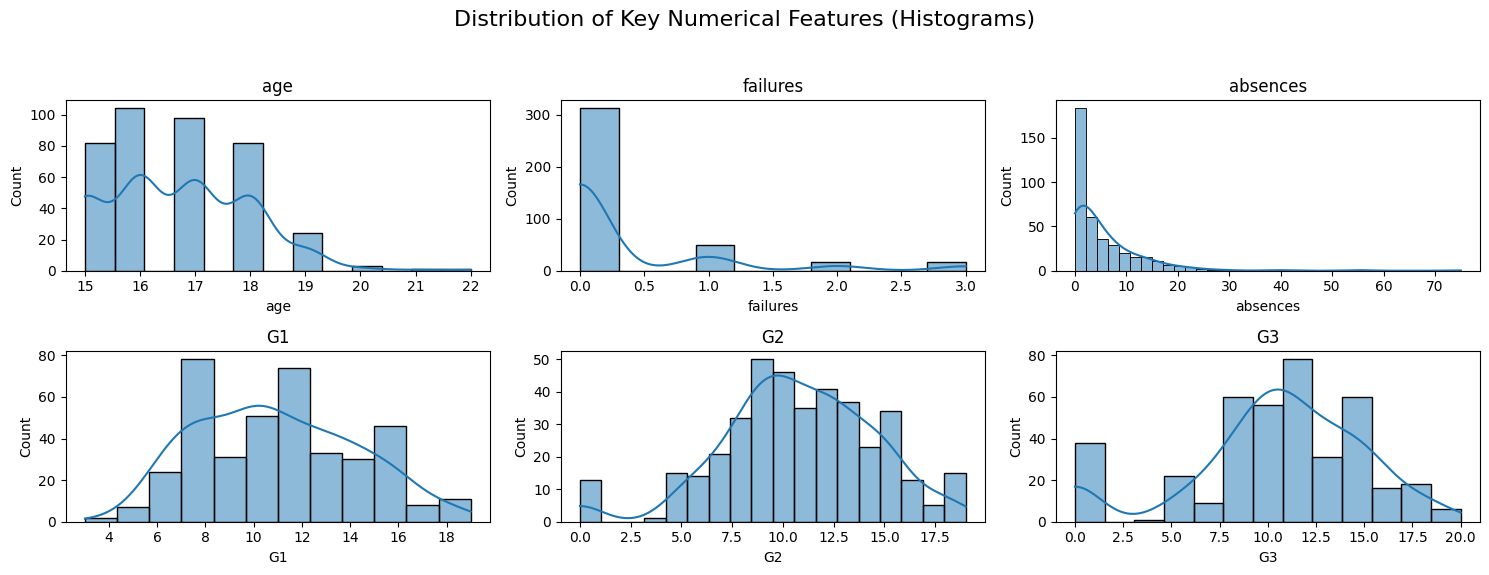

In [34]:
# Check the distribution of the Numerical Features

plt.figure(figsize=(15, 6))
plt.suptitle('Distribution of Key Numerical Features (Histograms)', fontsize=16)
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to fit suptitle
plt.show()

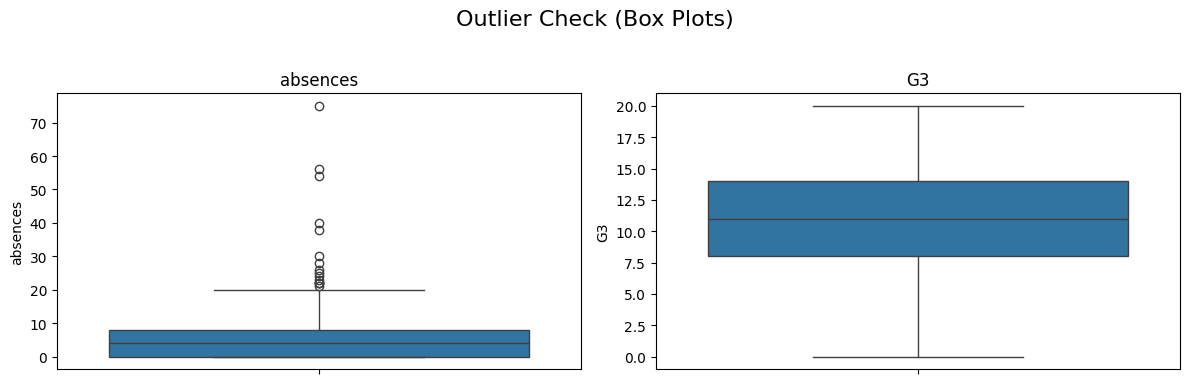

In [35]:
# Check for outliers in the dataset

plt.figure(figsize=(12, 4))
plt.suptitle('Outlier Check (Box Plots)', fontsize=16)
for i, col in enumerate(['absences', 'G3']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

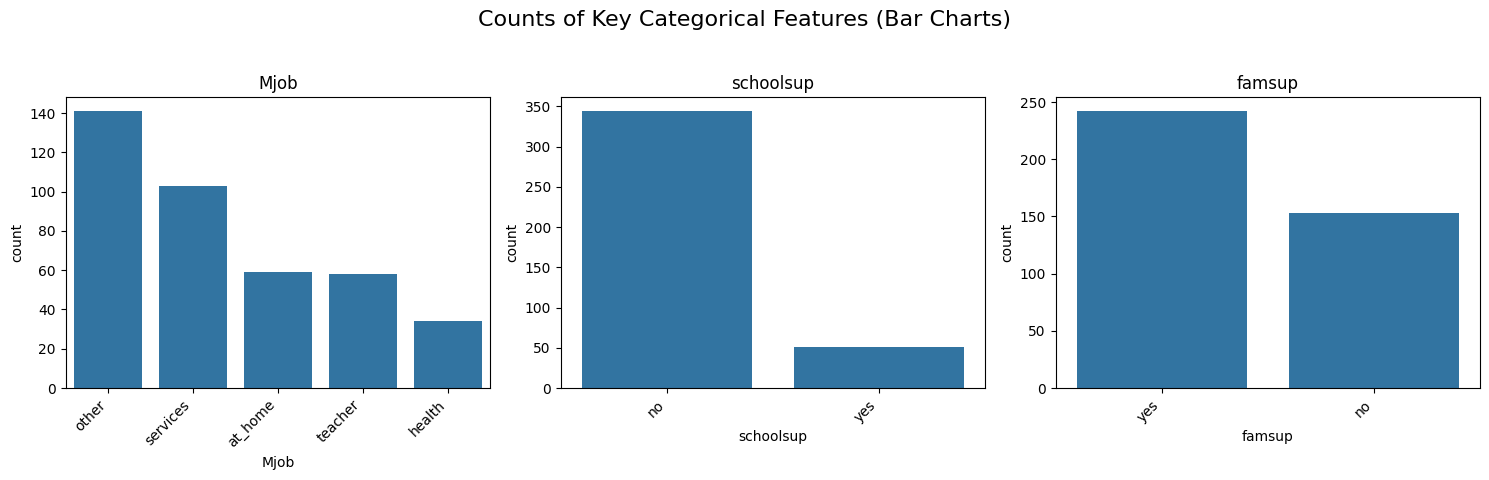

In [36]:
plt.figure(figsize=(15, 5))
plt.suptitle('Counts of Key Categorical Features (Bar Charts)', fontsize=16)
for i, col in enumerate(['Mjob', 'schoolsup', 'famsup']):
    plt.subplot(1, 3, i + 1)
    # Use value_counts to get ordered counts for the bar chart
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Phase 3: Data Preprocessing and Feature Scaling**

In [37]:
df_clust = df.copy()

In [38]:
df_clust

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [39]:
for col in binary_features:
    if len(df_clust[col].unique()) == 2:
        le = LabelEncoder()
        df_clust[col] = le.fit_transform(df_clust[col])

# 'sex': 'F' -> 0, 'M' -> 1
df_clust['sex'] = df_clust['sex'].apply(lambda x: 1 if x == 'M' else 0)

# 'address': 'U' -> 1 (Urban), 'R' -> 0 (Rural)
df_clust['address'] = df_clust['address'].apply(lambda x: 1 if x == 'U' else 0)

# One-Hot Encode Nominal Features

df_clust = pd.get_dummies(df_clust, columns=nominal_features, drop_first=True)

In [42]:
# drop the 'school' feature as it has low variance.

X = df_clust.drop(columns=['school'])

In [46]:
# Feature Scaling (CRITICAL STEP for K-Means)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nShape of the Scaled DataFrame:", X_scaled_df.shape)
print("First 5 rows of the Scaled Data (all values centered around 0):")
print(X_scaled_df.head())


Shape of the Scaled DataFrame: (395, 41)
First 5 rows of the Scaled Data (all values centered around 0):
   sex       age  address   famsize   Pstatus      Medu      Fedu  traveltime  \
0  0.0  1.023046      0.0 -0.636941 -2.938392  1.143856  1.360371    0.792251   
1  0.0  0.238380      0.0 -0.636941  0.340322 -1.600009 -1.399970   -0.643249   
2  0.0 -1.330954      0.0  1.570004  0.340322 -1.600009 -1.399970   -0.643249   
3  0.0 -1.330954      0.0 -0.636941  0.340322  1.143856 -0.479857   -0.643249   
4  0.0 -0.546287      0.0 -0.636941  0.340322  0.229234  0.440257   -0.643249   

   studytime  failures  ...  Mjob_teacher  Fjob_health  Fjob_other  \
0  -0.042286 -0.449944  ...     -0.414858    -0.218507   -1.104129   
1  -0.042286 -0.449944  ...     -0.414858    -0.218507    0.905691   
2  -0.042286  3.589323  ...     -0.414858    -0.218507    0.905691   
3   1.150779 -0.449944  ...     -0.414858    -0.218507   -1.104129   
4  -0.042286 -0.449944  ...     -0.414858    -0.218507   

# **Phase 4: Model Building and Optimization**

In [47]:
k_range = range(1, 11)

In [48]:
#  Initialize a list to store the WCSS/Inertia values
wcss = []

In [49]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)

    wcss.append(kmeans.inertia_)

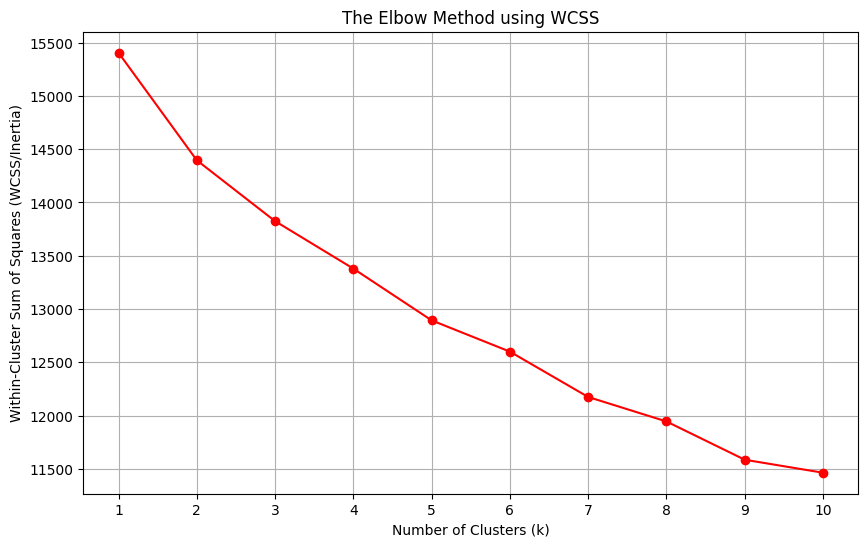

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', color='red')
plt.title('The Elbow Method using WCSS')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS/Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [54]:
optimal_k = 4

In [55]:
# Fit the Final K-Means Model

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster_Label'] = cluster_labels

# **Phase 5: Interpretation and Cluster Profiling**

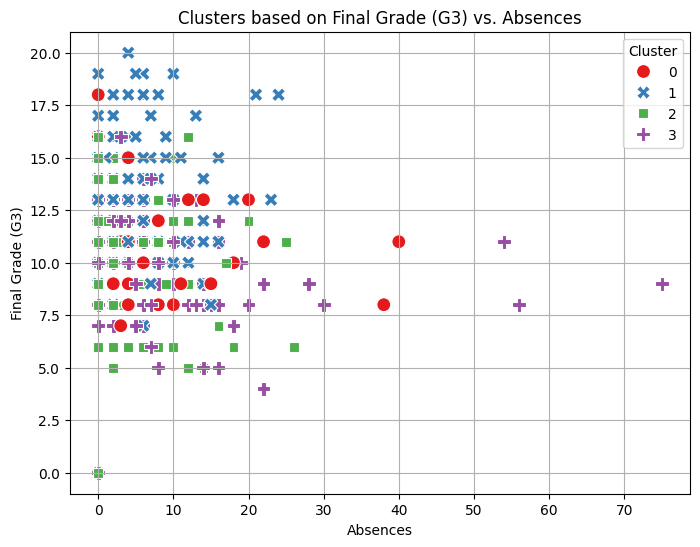

In [56]:
# 2. Visualize the Cluster Differences (e.g., Final Grade G3 vs. Absences)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', hue='Cluster_Label', data=df, palette='Set1', style='Cluster_Label', s=100)
plt.title('Clusters based on Final Grade (G3) vs. Absences')
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



*   Cluster 0: "High Achievers, Low Absences" (Highest G3, lowest absences)
* Cluster 1: "Low Engagement, At-Risk" (Lowest G3, high failures, high absences)
* Cluster 2: "Average Students, High Study Time" (Moderate G3, high study time)
* Cluster 3: "Socially Active, Low Parental Support" (Moderate G3, high goout score, low famsup)

